# Web scrapping project - house price in Zagreb

In this project we are going to use selenium webdriver and beautifulSoup for scrapping information of apartments in Zagreb,Croatia. After we are going to analyze all apartments based on price,location,living area etc.

In [1]:
#importing libraries
import csv
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

In [2]:
#setting Chrome driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/home/mattdmv/.wdm/drivers/chromedriver/linux64/89.0.4389.23/chromedriver] found in cache


In [3]:
# gettin url of page we want to scrap
url ="https://www.crozilla-nekretnine.com/oglasi/zagreb/stanovi/prodaja?page=1"
driver.get(url)

In [4]:
# setting soup
soup= BeautifulSoup(driver.page_source,"html.parser")

In [5]:
#finding all apartmets on single page
apartments=soup.find_all("div","ct-main-content")

In [6]:
len(apartments)

20

In [7]:
# identifying second apartment
sec_apartment=apartments[1]

In [8]:
#post number location
sec_apartment.find("div","ct-headline overflow").text.strip()[:5]

'10000'

In [9]:
#location of apartment
sec_apartment.find("div","ct-headline overflow").text.strip().replace(" ","").split("\n")[1]

'Malešnica'

In [10]:
#price of apartment
sec_apartment.find("span","upper price-big").text.strip().replace("\n","").replace(" ","")

'159.000€'

In [11]:
#sqft price of apartment
sec_apartment.find_all("li")[1].text.strip()[:5]

'1.217'

In [12]:
#living area 
sec_apartment.find_all("li")[2].text.strip().replace("\n","")[:6]

'130,70'

In [13]:
#number of rooms
sec_apartment.find_all("li")[3].text.strip().replace("\nbroj soba","")

'3'

In [15]:
#looping throw pages 1 to 161 and scrapping all information from each apartment on particular page
Location=[]
Post_number=[]
Price=[]
Sqft=[]
Living_area=[]
Rooms=[]
pages=range(1,162)

for page in pages:
    url ="https://www.crozilla-nekretnine.com/oglasi/zagreb/stanovi/prodaja?page={}".format(page)
    driver.get(url)
    for i in apartments:
        Location.append(i.find("div","ct-headline overflow").text.strip().replace(" ","").split("\n")[1])
        Post_number.append(i.find("div","ct-headline overflow").text.strip()[:5])                
        Price.append(i.find("span","upper price-big").text.strip().replace("\n","").replace(" ",""))
        Sqft.append(i.find_all("li")[1].text.strip()[:5])
        Living_area.append(i.find_all("li")[2].text.strip().replace("\n","")[:5])
        try:
            Rooms.append(i.find_all("li")[3].text.strip().replace("\nbroj soba",""))
        except:
            Rooms.append(0)

In [16]:
data=list(zip(Location,Post_number,Price,Sqft,Living_area,Rooms))

In [2]:
import pandas as pd

In [29]:
#making dataframe
df=pd.DataFrame(data,columns=["Location","Post_number","Price","Sqft_price","Living_area","Rooms"])

In [19]:
df.shape

(3220, 6)

In [21]:
df.sample(10)

,Location,Post_number,Price,Sqft_price,Living_area,Rooms
1272,Črnomerec,10000,195.000€,1.950,"100,0",4
18,Šestine,10000,273.000€,3.545,"77,00",3
685,Vrbani,10000,105.000€,2.917,"36,00",2
2977,Trešnjevka,10110,112.943€,2.689,"42,00",2
2909,Špansko,10147,125.000€,1.838,"68,00",3
2930,Trešnjevka,10110,75.000€,1.667,"45,00",2
126,Malešnica,10000,169.000€,1.493,"113,2",4
835,Črnomerec,10000,140.000€,1.972,"71,00",2
3,Črnomerec,10000,239.000€,1.648,"145,0",4
438,Šestine,10000,273.000€,3.545,"77,00",3


In [24]:
#saving to csv file
df.to_csv("Zagreb_housing_price")

In [372]:
df2=pd.read_csv("Zagreb_housing_price")
df2.sample(10)

,Unnamed: 0,Location,Post_number,Price,Sqft_price,Living_area,Rooms
2944,2944,Stenjevec,10090,140.000€,1.779,"78,69",3
316,316,Sesvete,10360,125.000€,1.603,"78,00",3
1664,1664,Stenjevec,10090,140.000€,1.779,"78,69",3
1515,1515,Črnomerec,10000,140.000€,1.972,"71,00",2
1583,1583,Črnomerec,10000,239.000€,1.648,"145,0",4
581,581,Malešnica,10000,159.000€,1.217,"130,7",3
497,497,Trešnjevka,10110,112.943€,2.689,"42,00",2
2977,2977,Trešnjevka,10110,112.943€,2.689,"42,00",2
3194,3194,DonjiGrad,10000,129.000€,1.792,"72,00",3
1395,1395,Črnomerec,10000,140.000€,1.972,"71,00",2


## Exploring data

In [373]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3220 non-null   int64 
 1   Location     3220 non-null   object
 2   Post_number  3220 non-null   int64 
 3   Price        3220 non-null   object
 4   Sqft_price   3220 non-null   object
 5   Living_area  3220 non-null   object
 6   Rooms        3220 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 176.2+ KB


In [374]:
df2.nunique()

Unnamed: 0     3220
Location         12
Post_number       6
Price            17
Sqft_price       19
Living_area      20
Rooms             5
dtype: int64

In [375]:
#locations
df2["Location"].unique()

array(['Trnsko', 'Malešnica', 'Črnomerec', 'Stenjevec', 'Vrbani',
       'DonjiGrad', 'Kajzerica', 'Špansko', 'Trešnjevka', 'Trnje',
       'Sesvete', 'Šestine'], dtype=object)

We have string in price column so we will drop that column and convert column with price into float.

In [376]:
df3=df2.copy()

In [377]:
#removing last 5 character in string 
df3["Price"] = [x[:-1] for x in df2["Price"]]
df3.head()

,Unnamed: 0,Location,Post_number,Price,Sqft_price,Living_area,Rooms
0,0,Trnsko,10020,naupi,"50,00",2broj,0
1,1,Malešnica,10000,159.000,1.217,"130,7",3
2,2,Malešnica,10000,259.000,1.704,"152,0",4
3,3,Črnomerec,10000,239.000,1.648,"145,0",4
4,4,Stenjevec,10090,140.000,1.779,"78,69",3


In [378]:
df3=df3[df3["Price"]!="naupi"]

In [379]:
df3.shape

(2898, 7)

In [380]:
df3["Price"]=df3["Price"].str.extract("(\d*\.?\d+)", expand=True)

In [381]:
df3.head()

,Unnamed: 0,Location,Post_number,Price,Sqft_price,Living_area,Rooms
1,1,Malešnica,10000,159.000,1.217,"130,7",3
2,2,Malešnica,10000,259.000,1.704,"152,0",4
3,3,Črnomerec,10000,239.000,1.648,"145,0",4
4,4,Stenjevec,10090,140.000,1.779,"78,69",3
5,5,Vrbani,10000,105.000,2.917,"36,00",2


In [382]:
df3["Price"]=df3["Price"].astype(float)

In [384]:
df3.head(20)

,Unnamed: 0,Location,Post_number,Price,Sqft_price,Living_area,Rooms
1,1,Malešnica,10000,159.000,1.217,"130,7",3
2,2,Malešnica,10000,259.000,1.704,"152,0",4
3,3,Črnomerec,10000,239.000,1.648,"145,0",4
4,4,Stenjevec,10090,140.000,1.779,"78,69",3
5,5,Vrbani,10000,105.000,2.917,"36,00",2
6,6,Malešnica,10000,169.000,1.493,"113,2",4
8,8,Kajzerica,10020,70.000,1.628,"43,00",3
9,9,Špansko,10147,125.000,1.838,"68,00",3
10,10,Trešnjevka,10110,75.000,1.667,"45,00",2
11,11,Trnje,10020,1.210,3.656,"331,0",7


In [308]:
df4=df3.copy()

In [309]:
#extracting only numeric values 
df4["Living_area"]=df3["Living_area"].str.extract("(\d*\.?\d+)", expand=True)

In [310]:
#converting into float
df4["Living_area"]=df4["Living_area"].astype(float)

In [311]:
#converting into float
df4["Sqft_price"]=df4["Sqft_price"].astype(float)*1000

In [312]:
#counting location
df4["Location"].value_counts()

Malešnica     483
Črnomerec     483
Trešnjevka    483
DonjiGrad     322
Špansko       161
Vrbani        161
Sesvete       161
Kajzerica     161
Trnje         161
Šestine       161
Stenjevec     161
Name: Location, dtype: int64

In [313]:
df4["Rooms"].describe()

count    2898.000000
mean        3.166667
std         1.166868
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Rooms, dtype: float64

In [325]:
df4.head()

,Location,Post_number,Price,Sqft_price,Living_area,Rooms
1,Malešnica,10000,159.0,1217.0,130.0,3
2,Malešnica,10000,259.0,1704.0,152.0,4
3,Črnomerec,10000,239.0,1648.0,145.0,4
4,Stenjevec,10090,140.0,1779.0,78.0,3
5,Vrbani,10000,105.0,2917.0,36.0,2


In [315]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 1 to 3219
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2898 non-null   int64  
 1   Location     2898 non-null   object 
 2   Post_number  2898 non-null   int64  
 3   Price        2898 non-null   float64
 4   Sqft_price   2898 non-null   float64
 5   Living_area  2898 non-null   float64
 6   Rooms        2898 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 181.1+ KB


In [316]:
#Droping column
df4=df4.drop(["Unnamed: 0"],axis=1)

In [317]:
df4.shape

(2898, 6)

## Analyzing aprtments in Zagreb

In [318]:
import seaborn as sns
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The most expensive location in Zagreb 

In [319]:
#avaerage sqft price by location
df4.groupby("Location")["Sqft_price"].mean()

Location
DonjiGrad     2516.500000
Kajzerica     1628.000000
Malešnica     1471.333333
Sesvete       1603.000000
Stenjevec     1779.000000
Trešnjevka    2285.333333
Trnje         3656.000000
Vrbani        2917.000000
Črnomerec     1856.666667
Šestine       3545.000000
Špansko       1838.000000
Name: Sqft_price, dtype: float64

<AxesSubplot:xlabel='Location'>

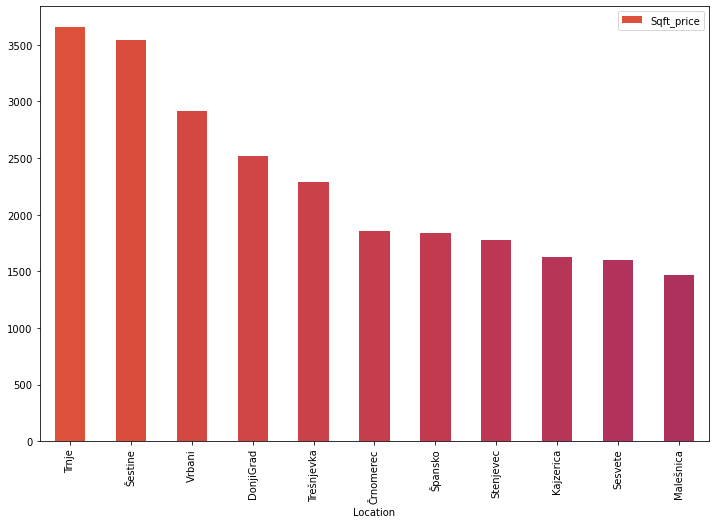

In [320]:
# Average sqft price  by location in Zagreb
location=df4.groupby("Location")["Sqft_price"].mean().reset_index("Location")
color = cm.inferno_r(np.linspace(.4, .8, 30))
location=location.sort_values("Sqft_price" , ascending=[False])
location.plot.bar(x="Location", y='Sqft_price', color=color , figsize=(12,8))

From above we can see that Trnje and Šestine are the most expensive location for buying apartment by sqft.

### Apartment with most living area by location

In [321]:
df4.groupby("Location")["Living_area"].max()

Location
DonjiGrad      72.0
Kajzerica      43.0
Malešnica     152.0
Sesvete        78.0
Stenjevec      78.0
Trešnjevka     45.0
Trnje         331.0
Vrbani         36.0
Črnomerec     145.0
Šestine        77.0
Špansko        68.0
Name: Living_area, dtype: float64

Text(0, 0.5, 'm2')

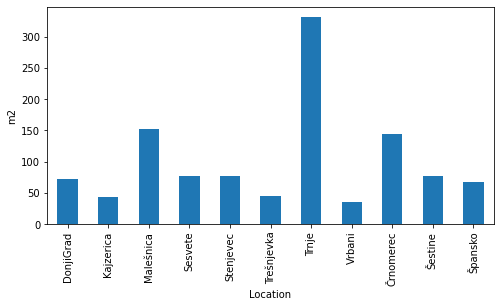

In [322]:
plt.figure(figsize=(8,4))
df4.groupby("Location")["Living_area"].max().plot.bar()
plt.ylabel("m2")

The biggest apartment is located in Trnje and has 331 m2.

/home/mattdmv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


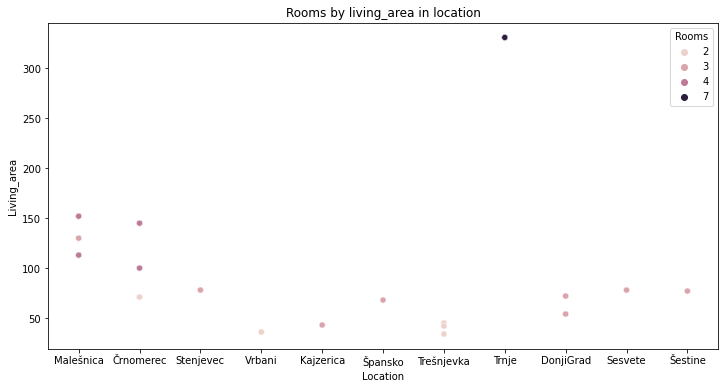

In [389]:
title = 'Rooms by living_area in location'
plt.figure(figsize=(12,6))
sns.scatterplot(df4.Location,df4.Living_area,hue=df4.Rooms).set_title(title)
plt.ioff()